<a href="https://colab.research.google.com/github/amitsutraye/Bengaluru-House-Price-Prediction/blob/main/Bengaluru_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
%matplotlib inline

In [86]:
hdata = pd.read_csv('/content/drive/MyDrive/DS/Bengaluru House Pricing/Bengaluru_House_Data.csv')

In [87]:
hdata.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [88]:
hdata.shape

(13320, 9)

In [89]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [90]:
hdata.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [91]:
#Dropping the rows that have nan values as the percentage of no of nan rows is comparitively less and do not affect any major data loss
hdata.dropna(subset=['location','size','bath'], inplace=True)

In [92]:
hdata.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
dtype: int64

In [93]:
hdata.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


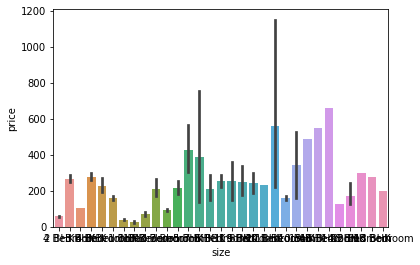

In [94]:
sns.barplot(x='size',y='price',data=hdata)


In [95]:
hdata['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [96]:
#Dropping down the society column as it has significant number of nan values and can't be filled through median or mean
hdata.drop('society', axis='columns', inplace=True)

In [97]:
hdata.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [98]:
hdata['balcony'] = hdata['balcony'].fillna(hdata['balcony'].median())

In [99]:
hdata.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [100]:
# Converting the size column to bhk
hdata.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [101]:
# Converting the size column to bhk
hdata['bhk'] = hdata['size'].apply(lambda x: int(x.split(' ')[0]))

In [102]:
hdata.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [103]:
hdata.drop(columns=['size'],inplace=True)

In [104]:
hdata.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [105]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [106]:
hdata['new_total_sqft'] = hdata.total_sqft.apply(convert_sqft_to_num)

In [107]:
hdata.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2,1200.0


In [108]:
hdata.drop(columns=['total_sqft'], inplace=True)

In [109]:
hdata.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


In [110]:
hdata.isna().sum()

area_type          0
availability       0
location           0
bath               0
balcony            0
price              0
bhk                0
new_total_sqft    46
dtype: int64

In [111]:
hdata.dropna(subset=['new_total_sqft'], inplace=True)

In [112]:
hdata.isna().sum()

area_type         0
availability      0
location          0
bath              0
balcony           0
price             0
bhk               0
new_total_sqft    0
dtype: int64

In [113]:
# Adding a new column of price_per_sqft
# In our dataset the price column is in Lakhs
hdata['price_per_sqft'] = (hdata['price']*100000)/hdata['new_total_sqft']
hdata.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [114]:
# Checking unique values of 'location' column
locations = list(hdata['location'].unique())
print(len(locations))

1298


In [115]:
# Removing the extra spaces at the end
hdata.location = hdata.location.apply(lambda x: x.strip())

In [116]:
# Calulating all the unqiue values in 'location' column
location_stats = hdata.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [117]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

hdata.location = hdata.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(hdata.location.unique())

241

In [118]:
# Labelling the dates into Not Ready
dates = hdata.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
hdata.availability = hdata.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(hdata.availability.unique())

2

In [119]:
hdata.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


Visualization to check for any outliers

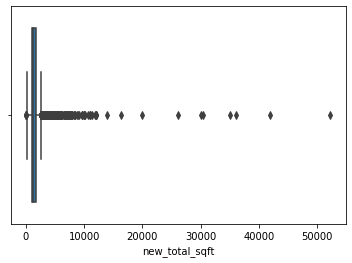

In [120]:
sns.boxplot(x='new_total_sqft',data=hdata)

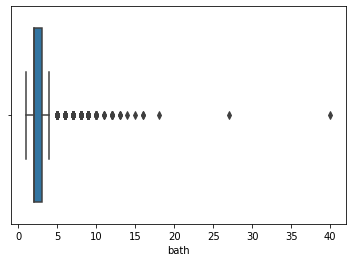

In [121]:
sns.boxplot(x='bath',data=hdata)

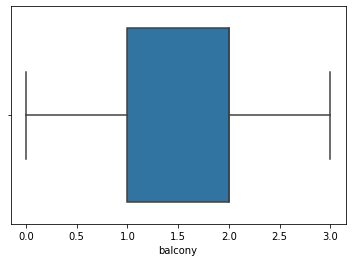

In [122]:
sns.boxplot(x='balcony',data=hdata)

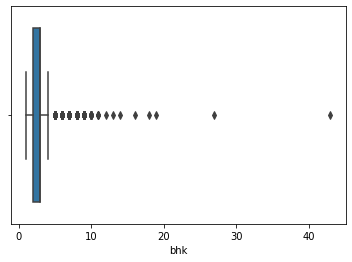

In [123]:
sns.boxplot(x='bhk',data=hdata)

In [124]:
#Calculating the zscores for price per sqft, bath and bhk
zscores = stats.zscore(hdata.price_per_sqft)

In [125]:
zscores

array([-0.03955046, -0.0309715 , -0.03387461, ..., -0.02494506,
        0.02329933, -0.0452559 ])

In [126]:
count = 0
for z in zscores:
  if z>3 or z<-3:
    print(z)
    count +=1

count

6.229264668108853
5.782058138640018
112.36628099537911
21.476877768093903
3.3302305945362765


5

In [127]:
hdata['zscores'] = stats.zscore(hdata.bath)
hdata = hdata[(hdata['zscores']<5) & (hdata['zscores']>-5)]

In [128]:
zscores = stats.zscore(hdata.bath)
count = 0
for z in zscores:
  if z>5 or z<-5:
    print(z)
    count +=1

count

5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463
5.277091296620463


41

In [129]:
hdata['zscores'] = stats.zscore(hdata.bhk)
hdata = hdata[(hdata['zscores']<5) & (hdata['zscores']>-5)]

In [130]:
zscores = stats.zscore(hdata.bhk)
count = 0
for z in zscores:
  if z>5 or z<-5:
    print(z)
    count +=1

count

0

In [131]:
hdata.isna().sum()

area_type         0
availability      0
location          0
bath              0
balcony           0
price             0
bhk               0
new_total_sqft    0
price_per_sqft    0
zscores           0
dtype: int64

In [132]:
hdata = hdata.drop(columns='zscores',axis=1)

In [133]:
hdata.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [134]:
hdata.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [135]:
dums = pd.get_dummies(hdata.area_type)

In [136]:
dums

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13315,1,0,0,0
13316,0,0,0,1
13317,1,0,0,0
13318,0,0,0,1


In [137]:
hdata = hdata.drop(columns='area_type')
hdata = pd.concat([hdata.reset_index(drop=True),dums.reset_index(drop=True)], axis=True)
hdata.head(5)

,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Not Ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606,0,0,0,1
1,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615,0,0,1,0
2,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861,0,0,0,1
4,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000,0,0,0,1


In [138]:
dums = pd.get_dummies(hdata.availability)
hdata = hdata.drop(columns='availability')
hdata = pd.concat([hdata.reset_index(drop=True),dums.reset_index(drop=True)], axis=True)
hdata.head(5)

,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Not Ready,Ready To Move
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606,0,0,0,1,1,0
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615,0,0,1,0,0,1
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556,1,0,0,0,0,1
3,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861,0,0,0,1,0,1
4,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000,0,0,0,1,0,1


In [139]:
dums = pd.get_dummies(hdata.location)
hdata = hdata.drop(columns='location')
hdata = pd.concat([hdata.reset_index(drop=True),dums.reset_index(drop=True)], axis=True)
hdata.head(5)

,bath,balcony,price,bhk,new_total_sqft,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Not Ready,Ready To Move,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1.0,39.07,2,1056.0,3699.810606,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4,2600.0,4615.384615,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,3,1440.0,4305.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3,1521.0,6245.890861,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,2,1200.0,4250.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
hdata.shape

(13116, 253)

In [141]:
#hdata.drop(columns=['price_per_sqft'], inplace=True)

In [142]:
# Dividing the data into separete train and test data for our convenience to check the effectiveness of model as we are not provided with any other test data

train_data = hdata.iloc[0:10000,:]

In [143]:
test_data = hdata.iloc[10001:,:]

In [144]:
train_data.shape

(10000, 252)

In [145]:
test_data.shape

(3115, 252)

In [146]:
X = train_data.drop(columns=['price'])
y = train_data['price']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [149]:
y_pred = reg.predict(X_test)

In [150]:
y_pred

array([ 30.  ,  89.5 , 231.5 , ...,  84.75,  68.75, 106.25])

In [151]:
mean_absolute_error(y_test,y_pred)

42.153572727272724

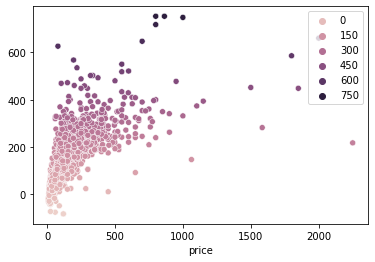

In [152]:
sns.scatterplot(x=y_test,y=y_pred, hue=y_pred)

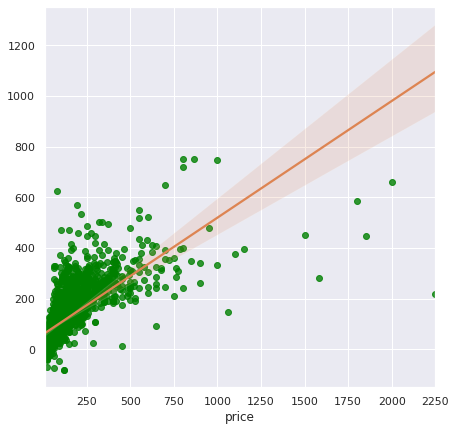

In [158]:
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x=y_test, y=y_pred, fit_reg=False, ax=ax,scatter_kws={"color": "green"})
sns.regplot(x=y_test, y=y_pred, scatter=False, ax=ax, scatter_kws={"color": "green"})